In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear

sns.set(style="white", context="talk")

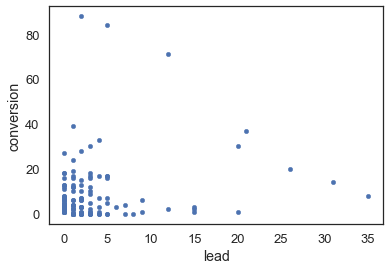

In [35]:
productos = data[(data['event'] == 'conversion') | (data['event'] == 'lead')]
productos = productos.groupby('model')['event'].value_counts().to_frame('cantidad')
productos = productos.unstack().reset_index()
productos.columns = ['model', 'conversion', 'lead']
productos = productos.fillna(0)

productos.plot.scatter(y = 'conversion', x = 'lead')

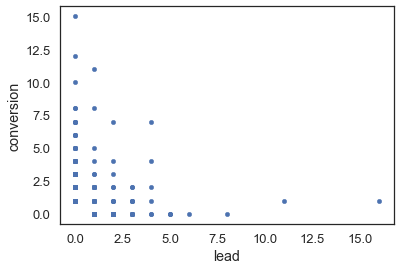

In [36]:
productos = data[(data['event'] == 'conversion') | (data['event'] == 'lead')]
productos = productos.groupby('person')['event'].value_counts().to_frame('cantidad')
productos = productos.unstack().reset_index()
productos.columns = ['person', 'conversion', 'lead']
productos = productos.fillna(0)
productos.shape
productos.plot.scatter(y = 'conversion', x = 'lead')

### No pareciese que el Lead influya en los productos comprados

In [60]:
filtro = data[(data.event == 'conversion') | (data.event == 'lead')]
filtro = filtro.groupby(['person', 'model']).event.value_counts().to_frame('cantidad')

filtro = filtro.unstack().fillna(0)

filtro = filtro.reset_index()
filtro.columns = ['person', 'model', 'conversion', 'lead']
filtro = filtro[filtro.lead > 0]
filtro.sum()
# filtro[['conversion', 'lead']].sum().to_frame('magnitudes').plot.pie(y = 'magnitudes', figsize = (8, 8), colors = ['#EE4266', '#FFD23F'])

person        0113991901bca04301db2fe603767f8e03bdcd8103d11a...
model         Samsung Galaxy On 7iPhone 6 PlusSamsung Galaxy...
conversion                                                   36
lead                                                        448
dtype: object

El 8% de las veces que un producto es agregado a **Lead** termina siendo comprado (ya sea por causa del Lead o por causa externa, no podemos determinarlo)